In [1]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
data08 = pd.read_csv('Resources/Forbes Global 2000 - 2008.csv')
data09 = pd.read_csv('Resources/Forbes Global 2000 - 2009.csv')
data10 = pd.read_csv('Resources/Forbes Global 2000 - 2010.csv')
data11 = pd.read_csv('Resources/Forbes Global 2000 - 2011.csv')
data12 = pd.read_csv('Resources/Forbes Global 2000 - 2012.csv')
data13 = pd.read_csv('Resources/Forbes Global 2000 - 2013.csv')
data14 = pd.read_csv('Resources/Forbes Global 2000 - 2014.csv')
data15 = pd.read_csv('Resources/Forbes Global 2000 - 2015.csv')
data16 = pd.read_csv('Resources/Forbes Global 2000 - 2016.csv')
data17 = pd.read_csv('Resources/Forbes Global 2000 - 2017.csv')
data18 = pd.read_csv('Resources/Forbes Global 2000 - 2018.csv', error_bad_lines=False)
data19 = pd.read_csv('Resources/Forbes Global 2000 - 2019.csv')
data20 = pd.read_csv('Resources/Forbes Global 2000 - 2020.csv')
data21 = pd.read_csv('Resources/Forbes Global 2000 - 2021.csv')

In [3]:
# Removing $ from the values
data20["Sales"] = data20["Sales"].str.replace('$','')
data20["Profits"] = data20["Profits"].str.replace('$','')
data20["Assets"] = data20["Assets"].str.replace('$','')
data20["Market Value"] = data20["Market Value"].str.replace('$','')

In [4]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data20['Sales']= data20['Sales'].replace(value,regex=True).map(pd.eval)
data20['Sales'] = round(data20['Sales'],2) # necessary?
data20['Profits']= data20['Profits'].replace(value,regex=True).map(pd.eval)
data20['Profits'] = round(data20['Profits'],2) # necessary?
data20['Assets']= data20['Assets'].replace(value,regex=True).map(pd.eval)
data20['Assets'] = round(data20['Assets'],2) # necessary?
data20['Market Value']= data20['Market Value'].replace(value,regex=True).map(pd.eval)
data20['Market Value'] = round(data20['Market Value'],2) # necessary?

In [5]:
# Removing $ from the values
data21["Sales"] = data21["Sales"].str.replace('$','')
data21["Profit"] = data21["Profit"].str.replace('$','')
data21["Assets"] = data21["Assets"].str.replace('$','')
data21["Market Value"] = data21["Market Value"].str.replace('$','')

In [6]:
# Replaced one NaN value with 0 to allow for formatting
data21 = data21.fillna(0)

In [7]:
# Convert M values to B and removing the characters
value = {'M':"*0.001",'B':'',',':''}
data21['Sales']= data21['Sales'].replace(value,regex=True).map(pd.eval)
data21['Sales'] = round(data21['Sales'],2) # necessary?
data21['Profit']= data21['Profit'].replace(value,regex=True).map(pd.eval)
data21['Profit'] = round(data21['Profit'],2) # necessary?
data21['Assets']= data21['Assets'].replace(value,regex=True).map(pd.eval)
data21['Assets'] = round(data21['Assets'],2) # necessary?
data21['Market Value']= data21['Market Value'].replace(value,regex=True).map(pd.eval)
data21['Market Value'] = round(data21['Market Value'],2) # necessary?

In [8]:
# Changing 0 back to NaN value in case needed
data21.replace(0,np.nan, inplace=True)

In [9]:
# Should column names for the currencies reflect billions? 

In [10]:
# rename the columns for concat
data08.columns = ['Company', 'Industry', 'Country', 'Market Value',
       'Profits', 'Assets', 'Sales', 'Rank', 'Year']
data09.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Profits', 'Assets',
       'Sales', 'Rank', 'Year']
data10.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data11.columns = ['Company', 'Industry', 'Country', 'Market Value', 'Sales', 'Profits',
       'Assets', 'Rank', 'Year']
data15.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data16.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data17.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data18.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data19.columns = ['Company', 'Market Value', 'Sales', 'Profits', 'Assets', 'Rank', 'Sector',
       'Industry', 'Continent', 'Country', 'Year']
data20.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets',
       'Market Value', 'Sector', 'Industry', 'Year']
data21.columns = ['Rank', 'Company', 'Country', 'Sales', 'Profits', 'Assets', 'Market Value',
       'Year']

In [11]:
#combine the dataset together 
frames = [data08, data09, data10, data11, data12, data13, data14, data15, data16, data17, data18, data19, data20, data21]

result = pd.concat(frames)

In [12]:
# Displaying new df
result

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Sector,Continent
0,HSBC Holdings,Banking,United Kingdom,180.81,19.13,2348.98,146.50,1.0,2008,NaN,NaN
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008,NaN,NaN
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,NaN,NaN
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,NaN,NaN
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1995,JTEKT,NaN,Japan,3.50,-0.03,25.00,13.10,1996.0,2021,NaN,NaN
1996,Insurance Australia Group,NaN,Australia,9.30,-0.21,7.10,5.40,1997.0,2021,NaN,NaN
1997,Sumec Corporation,NaN,China,1.30,0.08,7.50,13.00,1997.0,2021,NaN,NaN
1998,Gold Fields,NaN,South Africa,8.90,0.72,2.60,3.90,1999.0,2021,NaN,NaN


In [13]:
#result.to_csv("aroissues-forbes-global-2000-2008-2019/combined.csv")

In [14]:
# find US data
us = result.loc[result["Country"] == "United States"]

In [15]:
# Removing columns
us.drop(columns=['Sector','Continent'], inplace=True)

In [16]:
# Identifying unique companies
companies = us["Company"].unique()

In [17]:
# Grouping by years for companies
years = us.groupby("Year")["Company"].unique()

In [18]:
# Identifying the unique industries
industries = us["Industry"].unique()

In [19]:
industries # maybe select a few industries to reduce data for analysis

array(['Conglomerates', 'Banking', 'Oil & Gas Operations',
       'Diversified Financials', 'Telecommunications Services',
       'Retailing', 'Insurance', 'Household & Personal Products',
       'Software & Services', 'Technology Hardware & Equip',
       'Drugs & Biotechnology', 'Media', 'Food Drink & Tobacco',
       'Semiconductors', 'Aerospace & Defense',
       'Health Care Equipment & Svcs', 'Capital Goods', 'Chemicals',
       'Utilities', 'Materials', 'Hotels, Restaurants & Leisure',
       'Transportation', 'Consumer Durables', 'Food Markets',
       'Business Services & Supplies', 'Construction',
       'Food, Drink & Tobacco', 'Major Banks', 'Investment Services',
       'Telecommunications services', 'Discount Stores',
       'Diversified Insurance', 'Computer Services',
       'Household-Personal Care', 'Pharmaceuticals', 'Computer Hardware',
       'Software & Programming', 'Auto & Truck Manufacturers',
       'Medical Equipment & Supplies', 'Beverages',
       'Communic

In [20]:
profit_bins = [-100, 0, 5, 10, 100] # need to sort out size for profit amounts
labels = ["Profit Loss/No Profit", "Less than $5 bil", "Between $5-10 bil", "Above $10 bil"]
us["Profit Range"] = pd.cut(us['Profits'], profit_bins, labels=labels)
us

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
1,General Electric,Conglomerates,United States,330.93,22.21,795.34,172.74,2.0,2008,Above $10 bil
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,Above $10 bil
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,Above $10 bil
4,ExxonMobil,Oil & Gas Operations,United States,465.51,40.61,242.08,358.60,5.0,2008,Above $10 bil
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008,Above $10 bil
...,...,...,...,...,...,...,...,...,...,...
1982,Slack Technologies,NaN,United States,24.60,-0.30,22.70,0.90,1983.0,2021,Profit Loss/No Profit
1985,Penn National Gaming,NaN,United States,15.60,-0.67,46.00,3.60,1986.0,2021,Profit Loss/No Profit
1990,Pinnacle Bank,NaN,United States,7.00,0.31,7.30,1.30,1990.0,2021,Less than $5 bil
1994,HubSpot,NaN,United States,24.10,-0.08,12.00,0.88,1995.0,2021,Profit Loss/No Profit


In [21]:
# Testing a sample on banking industry
financials = us.loc[(us["Industry"] == "Banking") | (us["Industry"] == "Major Banks") | (us["Industry"] == "Regional Banks")
              | (us["Industry"] == "Diversified Financials") | (us["Industry"] == "Investment Services")
              | (us["Industry"] == "Consumer Financial Services")]
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
2,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,Above $10 bil
3,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,Above $10 bil
9,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008,Above $10 bil
22,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008,Above $10 bil
23,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
1775,CIT Group,Consumer Financial Services,United States,1.90,-0.21,58.90,3.20,1776.0,2020,Profit Loss/No Profit
1807,First Horizon National,Regional Banks,United States,2.80,0.35,43.50,1.70,1807.0,2020,Less than $5 bil
1860,Cullen/Frost Bankers,Regional Banks,United States,4.50,0.38,34.10,1.30,1861.0,2020,Less than $5 bil
1958,Wintrust Financial,Regional Banks,United States,2.40,0.33,38.80,1.80,1958.0,2020,Less than $5 bil


In [22]:
# Resetting index
financials.reset_index(inplace=True, drop=True)
financials

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
0,Bank of America,Banking,United States,176.53,14.98,1715.75,119.19,3.0,2008,Above $10 bil
1,JPMorgan Chase,Banking,United States,136.88,15.37,1562.15,116.35,4.0,2008,Above $10 bil
2,Berkshire Hathaway,Diversified Financials,United States,216.65,13.21,273.16,118.25,10.0,2008,Above $10 bil
3,Goldman Sachs Group,Diversified Financials,United States,67.16,11.60,1119.80,87.97,23.0,2008,Above $10 bil
4,Citigroup,Banking,United States,123.44,3.62,2187.63,159.23,24.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
863,CIT Group,Consumer Financial Services,United States,1.90,-0.21,58.90,3.20,1776.0,2020,Profit Loss/No Profit
864,First Horizon National,Regional Banks,United States,2.80,0.35,43.50,1.70,1807.0,2020,Less than $5 bil
865,Cullen/Frost Bankers,Regional Banks,United States,4.50,0.38,34.10,1.30,1861.0,2020,Less than $5 bil
866,Wintrust Financial,Regional Banks,United States,2.40,0.33,38.80,1.80,1958.0,2020,Less than $5 bil


In [23]:
financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868 entries, 0 to 867
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Company       868 non-null    object  
 1   Industry      868 non-null    object  
 2   Country       868 non-null    object  
 3   Market Value  868 non-null    float64 
 4   Profits       867 non-null    float64 
 5   Assets        868 non-null    float64 
 6   Sales         867 non-null    float64 
 7   Rank          868 non-null    float64 
 8   Year          868 non-null    int64   
 9   Profit Range  867 non-null    category
dtypes: category(1), float64(5), int64(1), object(3)
memory usage: 62.2+ KB


In [24]:
# Finding the profit max from all years
financials_highest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmax()]
financials_highest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
1,JPMorgan Chase,Banking,United States,136.880,15.370,1562.150,116.350,4.0,2008,Above $10 bil
101,Berkshire Hathaway,Diversified Financials,United States,122.110,4.990,267.400,107.790,19.0,2009,Less than $5 bil
186,Goldman Sachs Group,Diversified Financials,United States,84.950,13.390,849.000,51.670,25.0,2010,Above $10 bil
262,JPMorgan Chase,Major Banks,United States,182.200,17.400,2117.600,115.500,1.0,2011,Above $10 bil
322,JPMorgan Chase,Major Banks,United States,170.100,19.000,2265.800,110.800,2.0,2012,Above $10 bil
377,JPMorgan Chase,Major Banks,United States,191.400,21.300,2359.100,108.200,3.0,2013,Above $10 bil
445,Fannie Mae,Investment Services,United States,4.600,84.000,3270.100,122.900,355.0,2014,Above $10 bil
482,Wells Fargo,Major Banks,United States,278.273,23.057,1701.408,90.403,10.0,2015,Above $10 bil
536,Berkshire Hathaway,Investment Services,United States,360.145,24.083,561.068,210.821,4.0,2016,Above $10 bil
599,JPMorgan Chase,Major Banks,United States,306.616,24.231,2512.986,102.494,4.0,2017,Above $10 bil


In [25]:
# Finding the profit min from all years
financials_lowest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmin()]
financials_lowest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
20,Merrill Lynch,Diversified Financials,United States,48.020,-7.7800,1020.050,62.680,431.0,2008,Profit Loss/No Profit
125,Fannie Mae,Diversified Financials,United States,0.460,-58.3000,912.400,43.120,824.0,2009,Profit Loss/No Profit
217,Fannie Mae,Diversified Financials,United States,1.100,-71.9700,869.140,29.070,849.0,2010,Profit Loss/No Profit
292,Fannie Mae,Investment Services,United States,0.464,-14.0000,3222.000,154.300,790.0,2011,Profit Loss/No Profit
351,Fannie Mae,Investment Services,United States,1.800,-16.9000,3211.500,137.700,795.0,2012,Profit Loss/No Profit
414,CIT Group,Consumer Financial Services,United States,9.000,-0.6000,44.000,4.000,1265.0,2013,Profit Loss/No Profit
477,Interactive Brokers Group,Investment Services,United States,1.200,0.0000,37.900,1.100,1806.0,2014,Profit Loss/No Profit
528,Interactive Brokers Group,Investment Services,United States,1.986,0.0445,43.385,1.100,1751.0,2015,Less than $5 bil
588,INTL FCStone,Regional Banks,United States,0.539,0.0539,5.217,24.469,1630.0,2016,Less than $5 bil
647,CIT Group,Consumer Financial Services,United States,8.799,-0.8609,64.170,4.351,1272.0,2017,Profit Loss/No Profit


In [26]:
financials['Company'].unique()

array(['Bank of America', 'JPMorgan Chase', 'Berkshire Hathaway',
       'Goldman Sachs Group', 'Citigroup', 'Wells Fargo', 'Wachovia',
       'Morgan Stanley', 'Lehman Bros Holdings', 'American Express',
       'US Bancorp', 'Bank of New York Mellon', 'Capital One Financial',
       'SunTrust Banks', 'State Street', 'PNC Financial Services', 'BB&T',
       'Regions Financial', 'Principal Financial', 'Charles Schwab',
       'Merrill Lynch', 'Fifth Third Bancorp', 'Ameriprise Financial',
       'Fannie Mae', 'KeyCorp', 'Freddie Mac', 'Northern Trust',
       'BlackRock', 'Washington Mutual', 'ProLogis', 'Franklin Resources',
       'National City', 'M&T Bank', 'Simon Property Group',
       'NYSE Euronext', 'SLM', 'CME Group', 'Comerica', 'Vornado Realty',
       'Marshall & Ilsley', 'Host Hotels & Resorts', 'MasterCard',
       'Countrywide Financial', 'TD Ameritrade Holding',
       'Equity Residential', 'Legg Mason', 'Annaly Capital Mgmt',
       'Western Union', 'Boston Properties'

In [27]:
std_financials = financials.groupby('Company').aggregate({'Profits':["mean",
                                "median", "var", "std", "sem", "min", "max"]})
std_financials

Profits                                        \
                               mean  median       var       std       sem   
Company                                                                     
AGNC Investment           -0.032250  0.3760  1.884257  1.372682  0.686341   
AMB Property               0.310000  0.3100       NaN       NaN       NaN   
Affiliated Managers Group  0.513080  0.4713  0.015108  0.122915  0.054969   
Ally Financial             1.073750  1.0335  0.017709  0.133075  0.066537   
AmeriCredit                0.230000  0.2300       NaN       NaN       NaN   
...                             ...     ...       ...       ...       ...   
Western Alliance Bancorp.  0.448000  0.4480  0.000288  0.016971  0.012000   
Western Union              0.947980  0.9099  0.020772  0.144125  0.064454   
Wintrust Financial         0.340000  0.3400  0.000200  0.014142  0.010000   
Zions Bancorp              0.235285  0.4000  0.300089  0.547804  0.151933   
iStar Financial            0.240000  0.2400       NaN       NaN       NaN   

                                          
                             min     max  
Company                                   
AGNC Investment           -2.000  1.1190  
AMB Property               0.310  0.3100  
Affiliated Managers Group  0.400  0.7201  
Ally Financial             0.965  1.2630  
AmeriCredit                0.230  0.2300  
...                          ...     ...  
Western Alliance Bancorp.  0.436  0.4600  
Western Union              0.850  1.2000  
Wintrust Financial         0.330  0.3500  
Zions Bancorp             -1.220  0.8840  
iStar Financial            0.240  0.2400  

[154 rows x 7 columns]

In [28]:
financials['Profits'].mean()

2.2654229527104963

In [29]:
years = [2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020]

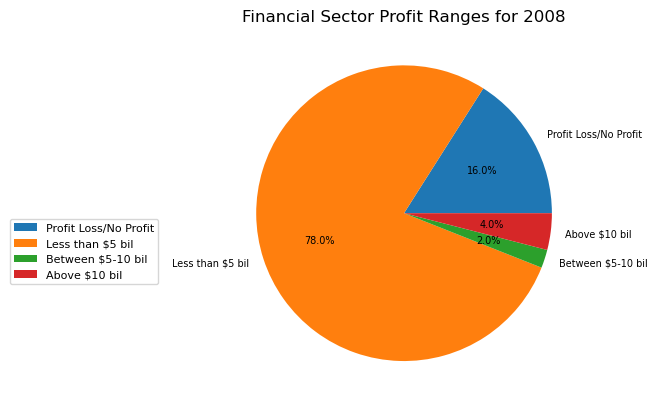

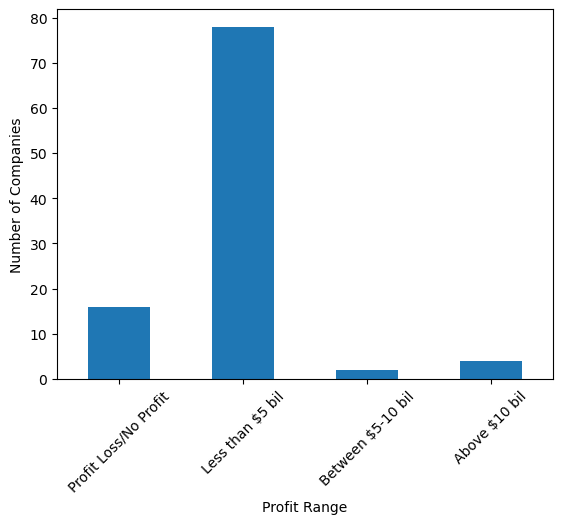

Profit Range
Profit Loss/No Profit    16
Less than $5 bil         78
Between $5-10 bil         2
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     1.117600
median   0.375000
var      9.612352
std      3.100379
sem      0.310038
min     -7.780000
max     15.370000


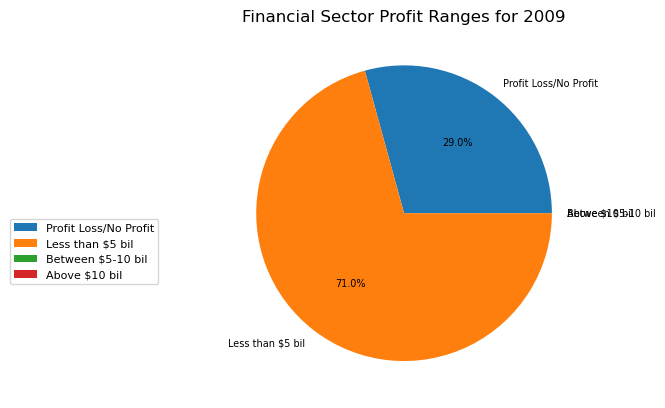

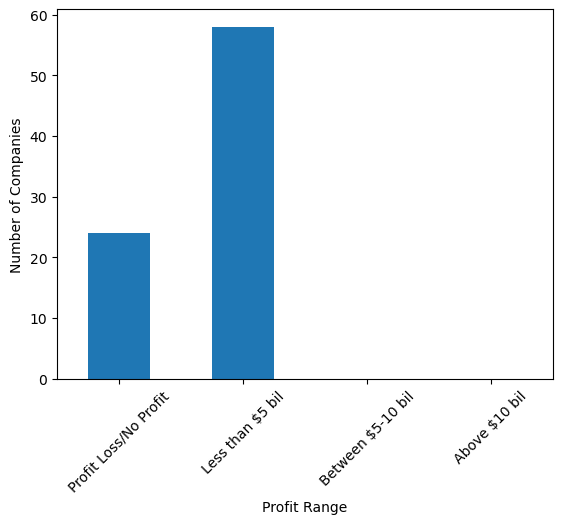

Profit Range
Profit Loss/No Profit    24
Less than $5 bil         58
Between $5-10 bil         0
Above $10 bil             0
Name: Profit Range, dtype: int64
          Profits
mean    -1.333293
median   0.245000
var     82.767882
std      9.097686
sem      1.004671
min    -58.300000
max      4.990000


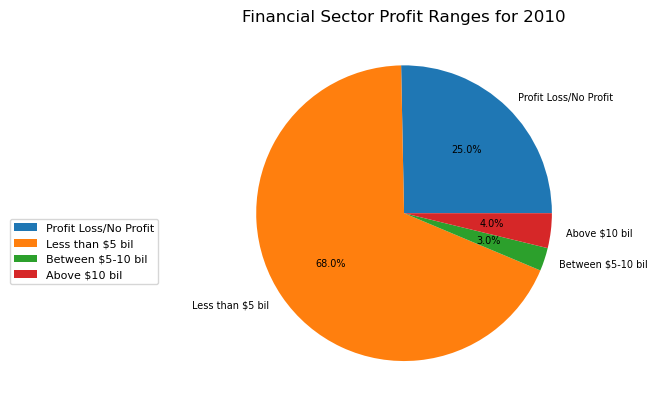

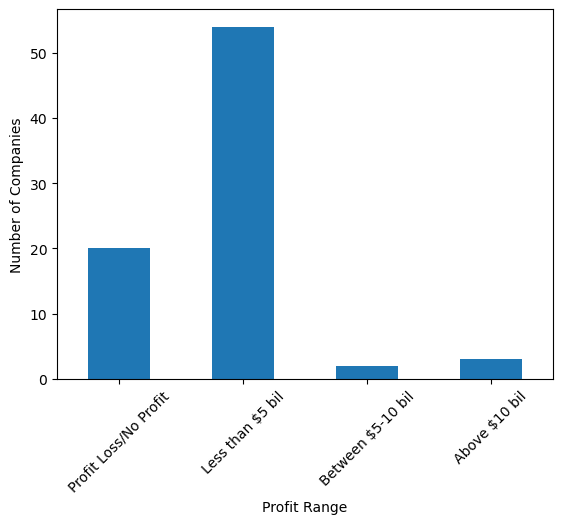

Profit Range
Profit Loss/No Profit    20
Less than $5 bil         54
Between $5-10 bil         2
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean    -0.307848
median   0.270000
var     80.499479
std      8.972150
sem      1.009446
min    -71.970000
max     13.390000


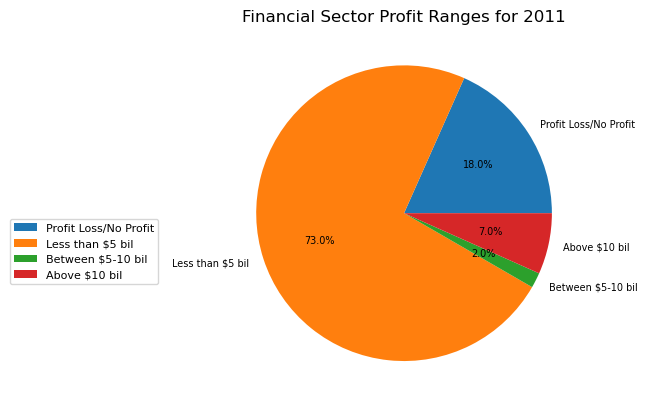

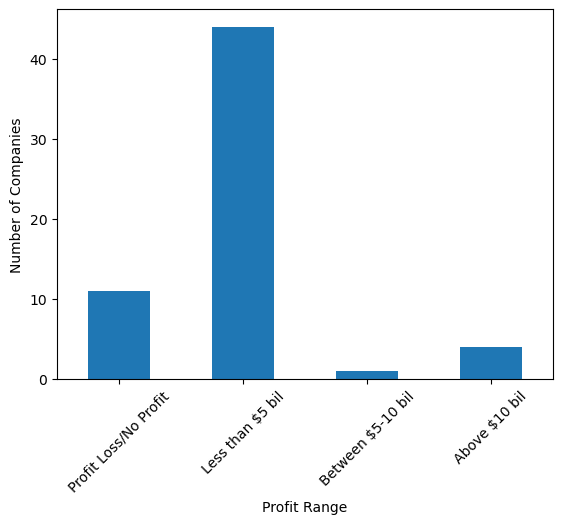

Profit Range
Profit Loss/No Profit    11
Less than $5 bil         44
Between $5-10 bil         1
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     1.285462
median   0.542200
var     20.639705
std      4.543094
sem      0.586511
min    -14.000000
max     17.400000


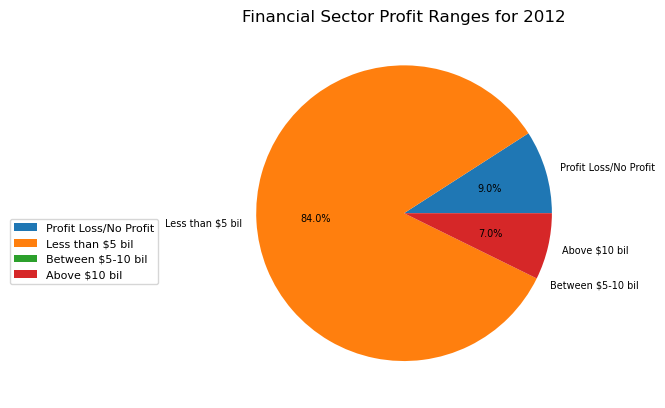

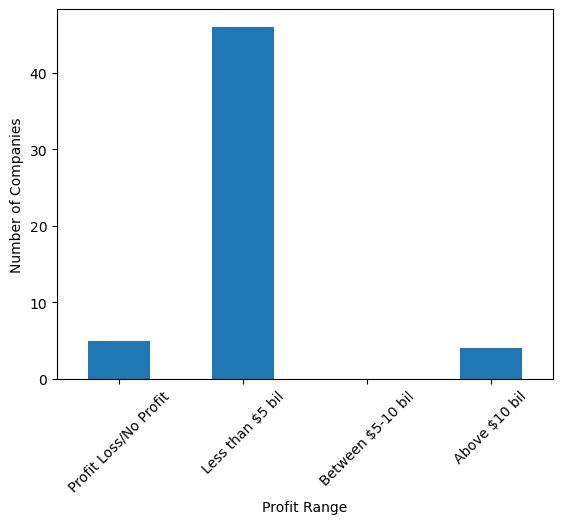

Profit Range
Profit Loss/No Profit     5
Less than $5 bil         46
Between $5-10 bil         0
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     1.741818
median   0.800000
var     21.375071
std      4.623318
sem      0.623408
min    -16.900000
max     19.000000


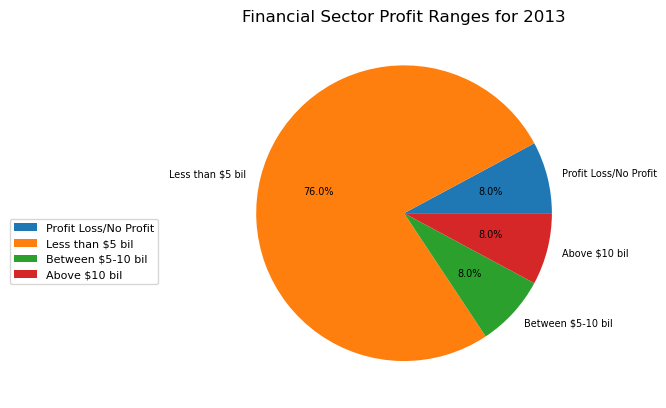

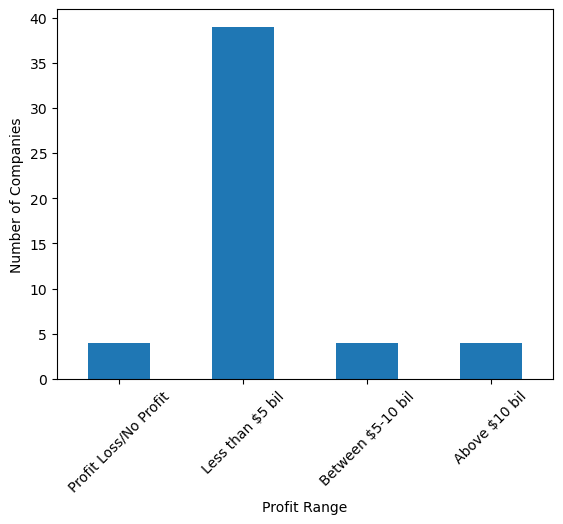

Profit Range
Profit Loss/No Profit     4
Less than $5 bil         39
Between $5-10 bil         4
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     2.839216
median   0.900000
var     21.110431
std      4.594609
sem      0.643374
min     -0.600000
max     21.300000


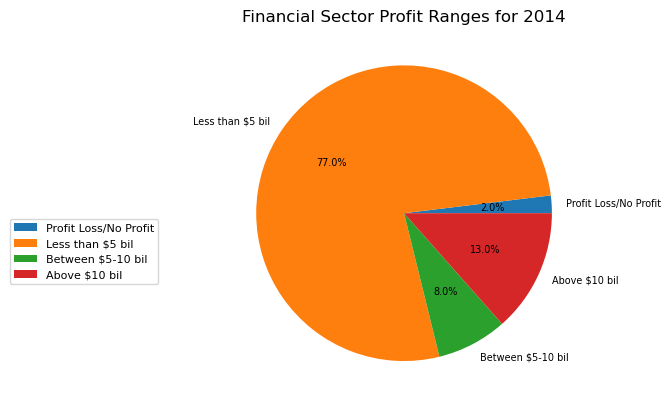

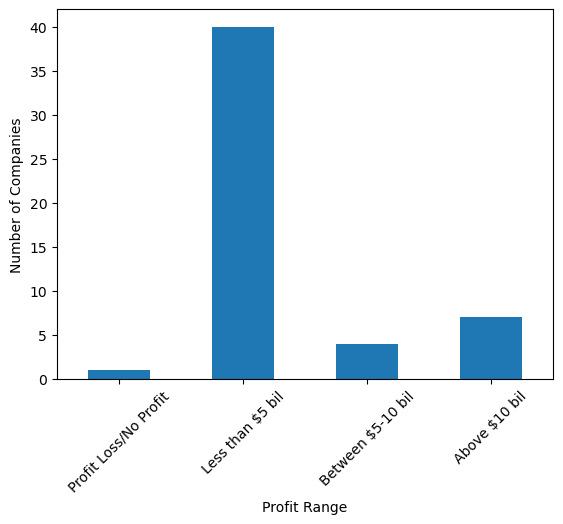

Profit Range
Profit Loss/No Profit     1
Less than $5 bil         40
Between $5-10 bil         4
Above $10 bil             7
Name: Profit Range, dtype: int64
           Profits
mean      5.546154
median    1.100000
var     187.275083
std      13.684849
sem       1.897747
min       0.000000
max      84.000000


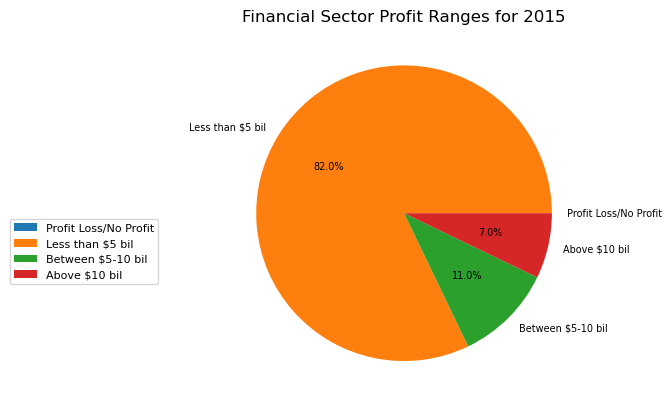

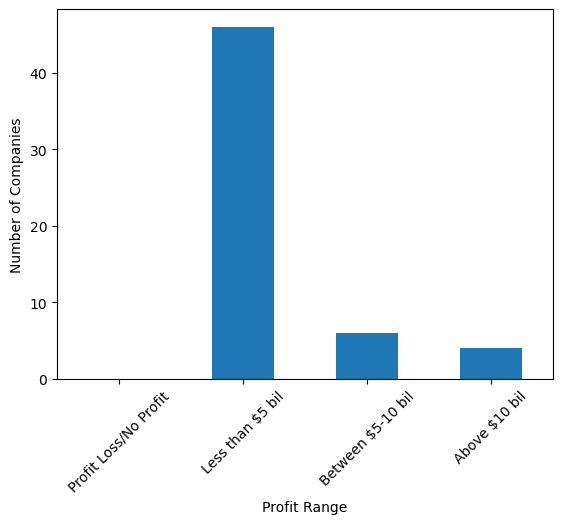

Profit Range
Profit Loss/No Profit     0
Less than $5 bil         46
Between $5-10 bil         6
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     3.219080
median   1.152000
var     26.035331
std      5.102483
sem      0.681848
min      0.044500
max     23.057000


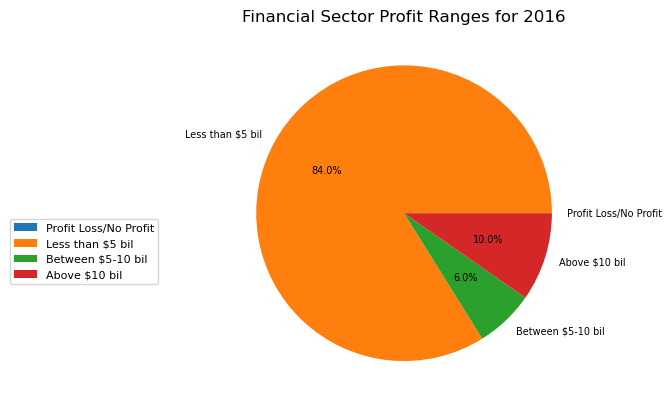

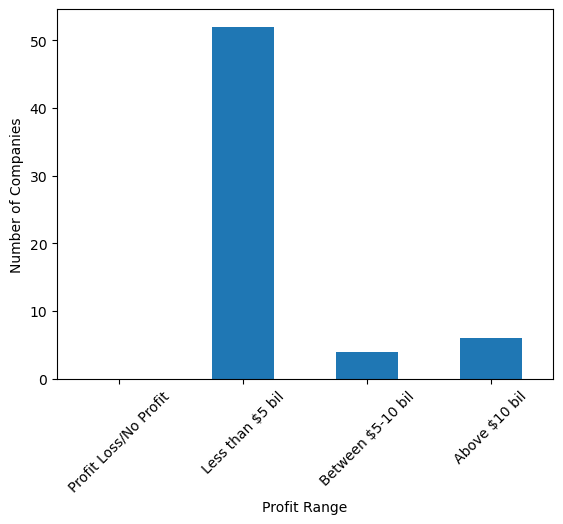

Profit Range
Profit Loss/No Profit     0
Less than $5 bil         52
Between $5-10 bil         4
Above $10 bil             6
Name: Profit Range, dtype: int64
          Profits
mean     3.286476
median   1.114650
var     31.277506
std      5.592630
sem      0.710265
min      0.053900
max     24.083000


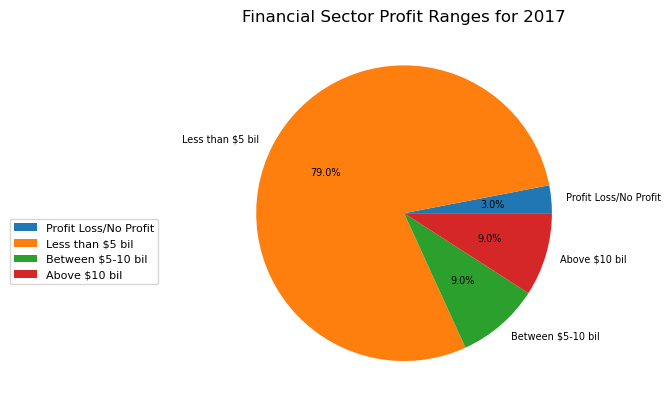

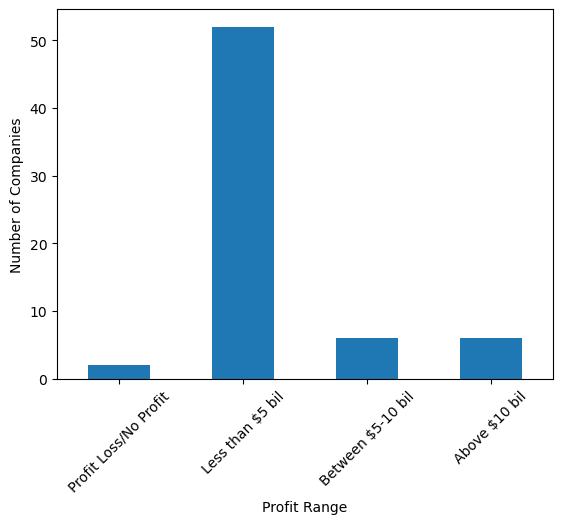

Profit Range
Profit Loss/No Profit     2
Less than $5 bil         52
Between $5-10 bil         6
Above $10 bil             6
Name: Profit Range, dtype: int64
          Profits
mean     3.186498
median   1.056000
var     30.701731
std      5.540914
sem      0.682039
min     -0.860900
max     24.231000


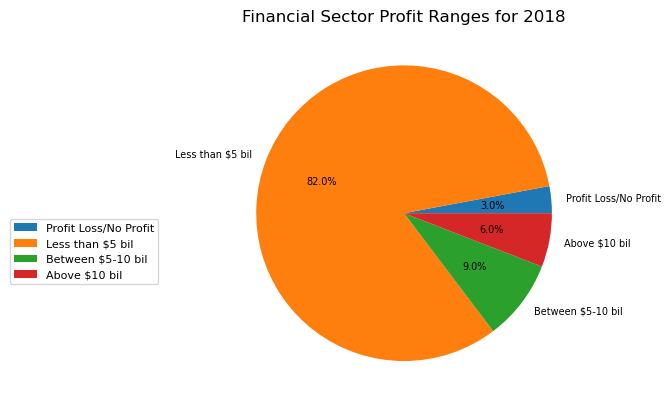

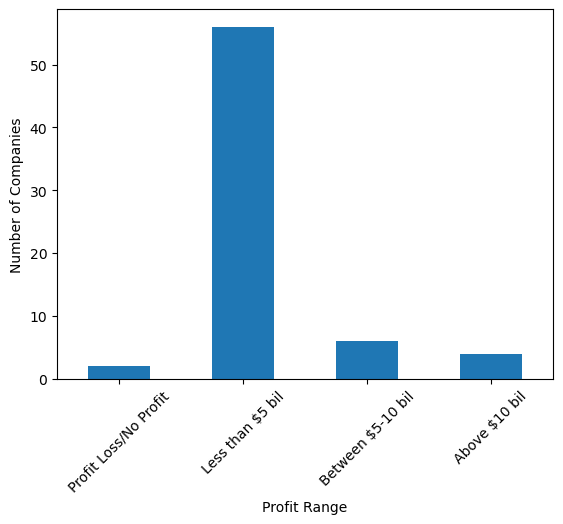

Profit Range
Profit Loss/No Profit     2
Less than $5 bil         56
Between $5-10 bil         6
Above $10 bil             4
Name: Profit Range, dtype: int64
          Profits
mean     3.235634
median   1.294450
var     43.966895
std      6.630754
sem      0.804097
min     -5.838000
max     39.742000


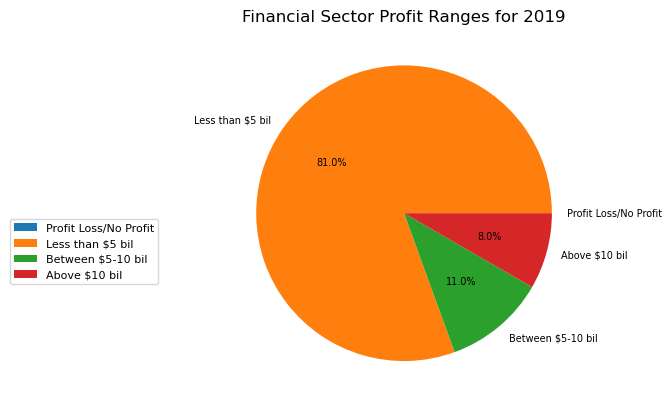

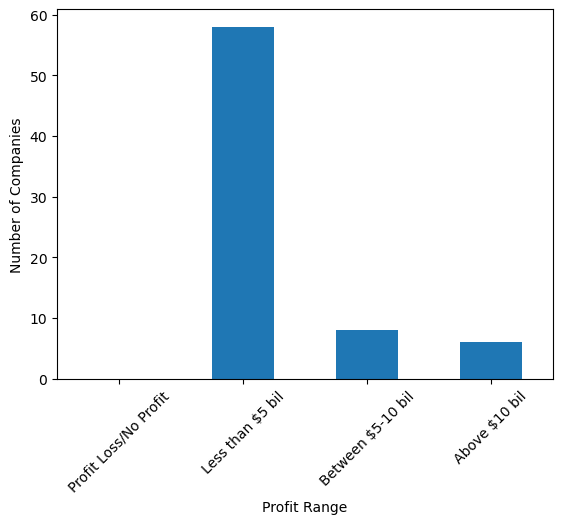

Profit Range
Profit Loss/No Profit     0
Less than $5 bil         58
Between $5-10 bil         8
Above $10 bil             6
Name: Profit Range, dtype: int64
          Profits
mean     3.670583
median   1.464500
var     38.809724
std      6.229745
sem      0.734183
min      0.079000
max     32.738000


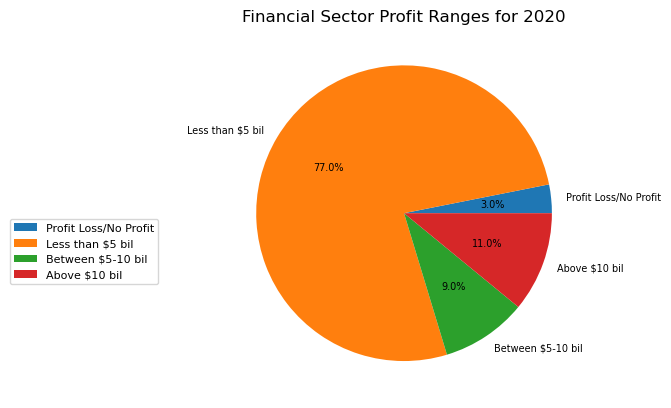

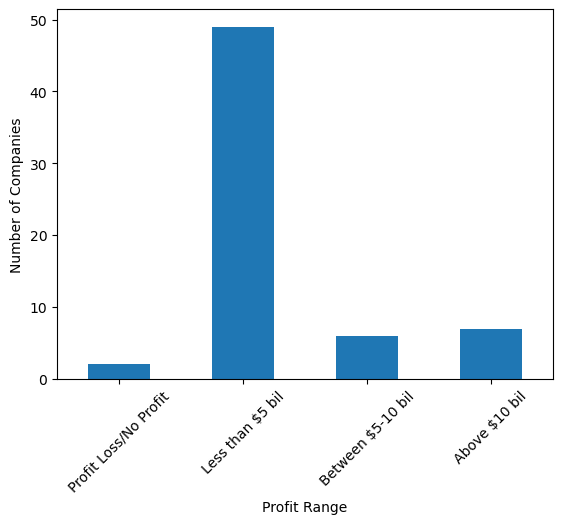

Profit Range
Profit Loss/No Profit     2
Less than $5 bil         49
Between $5-10 bil         6
Above $10 bil             7
Name: Profit Range, dtype: int64
           Profits
mean      4.706875
median    1.450000
var     126.989035
std      11.268941
sem       1.408618
min      -2.000000
max      81.400000


In [30]:
for year in years:
    profit_year = financials[financials['Year'] == year]
    ranges = profit_year.groupby('Profit Range')['Profit Range'].count()
    plt.pie(ranges.values,labels=ranges.index.values,autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',radius=1,textprops={'fontsize': 7})
    plt.title(f"Financial Sector Profit Ranges for {year}", pad=5)
    plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)
    plt.show()
    ranges.plot.bar()
    plt.xticks(rotation=45, ha='center')
    plt.ylabel('Number of Companies')
    plt.xlabel('Profit Range')
    plt.show()    
    info = profit_year.aggregate({'Profits':["mean",
                                "median", "var", "std", "sem", "min", "max"]})    
    print(ranges)
    print(info)


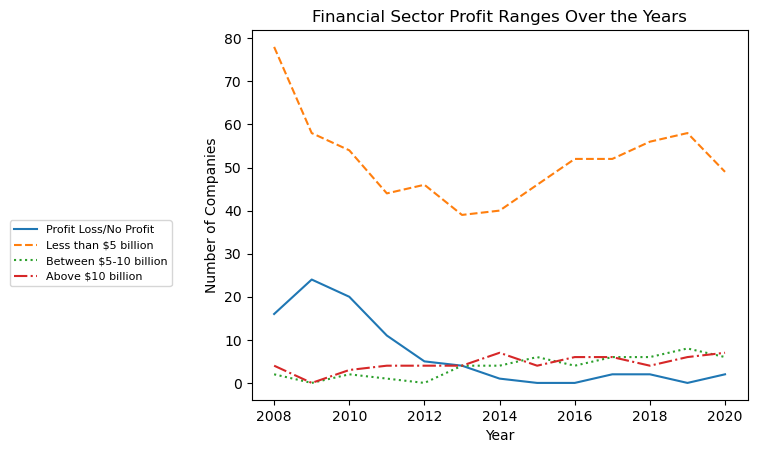

In [31]:
loss = []
less = []
between = []
above = []

for year in years:
    profits = financials[financials['Year'] == year]
    range = profits.groupby('Profit Range')['Profit Range'].count()
    loss.append(range.iloc[0])
    less.append(range.iloc[1])
    between.append(range.iloc[2])
    above.append(range.iloc[3])

plt.plot(years, loss, label = 'Profit Loss/No Profit', linestyle = '-')
plt.plot(years, less, label = 'Less than $5 billion', linestyle = '--')
plt.plot(years, between, label = 'Between $5-10 billion', linestyle = 'dotted')
plt.plot(years, above, label = 'Above $10 billion', linestyle = 'dashdot')
plt.xticks()
plt.ylabel('Number of Companies')
plt.xlabel('Year')
plt.title('Financial Sector Profit Ranges Over the Years')
plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)

In [32]:
tech = us.loc[(us["Industry"] == 'Software & Services') | (us["Industry"] == 'Technology Hardware & Equip') | (us["Industry"] == 'Computer Services')
              | (us["Industry"] == 'Computer Hardware') | (us["Industry"] == 'Computer Storage Devices')
              | (us["Industry"] == 'Computer & Electronics Retail') | (us["Industry"] == 'Electronics') |(us["Industry"] == 'Consumer Electronics')]

In [33]:
tech

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
36,IBM,Software & Services,United States,157.62,10.42,120.43,98.79,37.0,2008,Above $10 bil
52,Hewlett-Packard,Technology Hardware & Equip,United States,122.04,7.85,88.57,107.67,53.0,2008,Between $5-10 bil
62,Microsoft,Software & Services,United States,253.15,16.96,67.34,57.90,63.0,2008,Above $10 bil
89,Cisco Systems,Technology Hardware & Equip,United States,145.39,8.07,55.30,37.68,90.0,2008,Between $5-10 bil
175,Oracle,Software & Services,United States,96.57,4.78,35.65,20.08,176.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
1448,Arrow Electronics,Electronics,United States,5.00,-0.30,15.40,28.10,1449.0,2020,Profit Loss/No Profit
1570,Jabil Circuit,Electronics,United States,4.30,0.13,13.10,26.30,1571.0,2020,Less than $5 bil
1702,Zebra Technologies,Electronics,United States,12.20,0.47,1.90,3.80,1703.0,2020,Less than $5 bil
1764,Splunk,Computer Services,United States,22.30,-0.34,5.40,2.40,1765.0,2020,Profit Loss/No Profit


In [34]:
tech.reset_index(inplace=True, drop=True)
tech

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
0,IBM,Software & Services,United States,157.62,10.42,120.43,98.79,37.0,2008,Above $10 bil
1,Hewlett-Packard,Technology Hardware & Equip,United States,122.04,7.85,88.57,107.67,53.0,2008,Between $5-10 bil
2,Microsoft,Software & Services,United States,253.15,16.96,67.34,57.90,63.0,2008,Above $10 bil
3,Cisco Systems,Technology Hardware & Equip,United States,145.39,8.07,55.30,37.68,90.0,2008,Between $5-10 bil
4,Oracle,Software & Services,United States,96.57,4.78,35.65,20.08,176.0,2008,Less than $5 bil
...,...,...,...,...,...,...,...,...,...,...
358,Arrow Electronics,Electronics,United States,5.00,-0.30,15.40,28.10,1449.0,2020,Profit Loss/No Profit
359,Jabil Circuit,Electronics,United States,4.30,0.13,13.10,26.30,1571.0,2020,Less than $5 bil
360,Zebra Technologies,Electronics,United States,12.20,0.47,1.90,3.80,1703.0,2020,Less than $5 bil
361,Splunk,Computer Services,United States,22.30,-0.34,5.40,2.40,1765.0,2020,Profit Loss/No Profit


In [35]:
tech_lowest_profits = financials.loc[financials.groupby("Year")["Profits"].idxmin()]
tech_lowest_profits

,Company,Industry,Country,Market Value,Profits,Assets,Sales,Rank,Year,Profit Range
20,Merrill Lynch,Diversified Financials,United States,48.020,-7.7800,1020.050,62.680,431.0,2008,Profit Loss/No Profit
125,Fannie Mae,Diversified Financials,United States,0.460,-58.3000,912.400,43.120,824.0,2009,Profit Loss/No Profit
217,Fannie Mae,Diversified Financials,United States,1.100,-71.9700,869.140,29.070,849.0,2010,Profit Loss/No Profit
292,Fannie Mae,Investment Services,United States,0.464,-14.0000,3222.000,154.300,790.0,2011,Profit Loss/No Profit
351,Fannie Mae,Investment Services,United States,1.800,-16.9000,3211.500,137.700,795.0,2012,Profit Loss/No Profit
414,CIT Group,Consumer Financial Services,United States,9.000,-0.6000,44.000,4.000,1265.0,2013,Profit Loss/No Profit
477,Interactive Brokers Group,Investment Services,United States,1.200,0.0000,37.900,1.100,1806.0,2014,Profit Loss/No Profit
528,Interactive Brokers Group,Investment Services,United States,1.986,0.0445,43.385,1.100,1751.0,2015,Less than $5 bil
588,INTL FCStone,Regional Banks,United States,0.539,0.0539,5.217,24.469,1630.0,2016,Less than $5 bil
647,CIT Group,Consumer Financial Services,United States,8.799,-0.8609,64.170,4.351,1272.0,2017,Profit Loss/No Profit


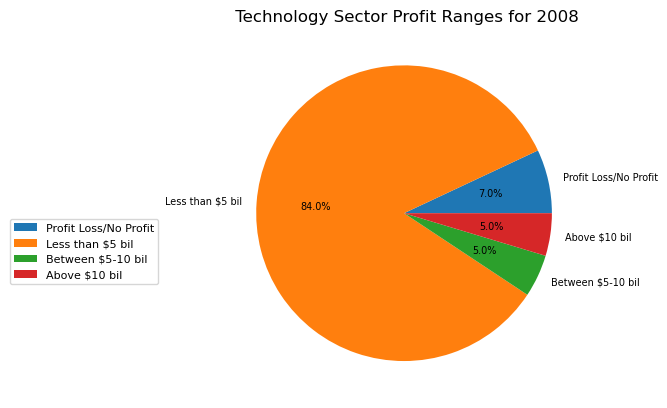

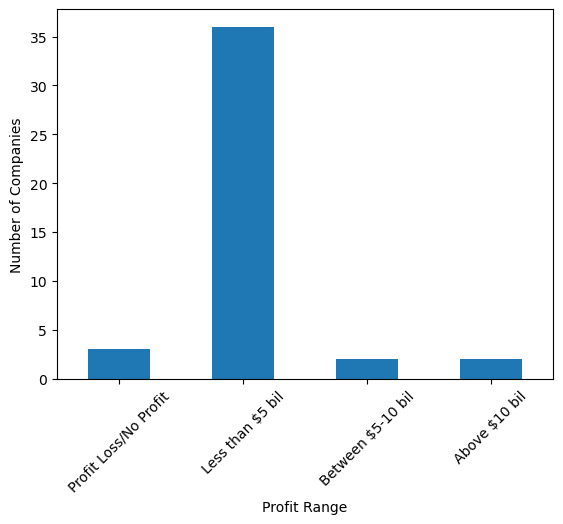

Profit Range
Profit Loss/No Profit     3
Less than $5 bil         36
Between $5-10 bil         2
Above $10 bil             2
Name: Profit Range, dtype: int64
          Profits
mean     1.799535
median   0.450000
var     11.346752
std      3.368494
sem      0.513691
min     -1.150000
max     16.960000


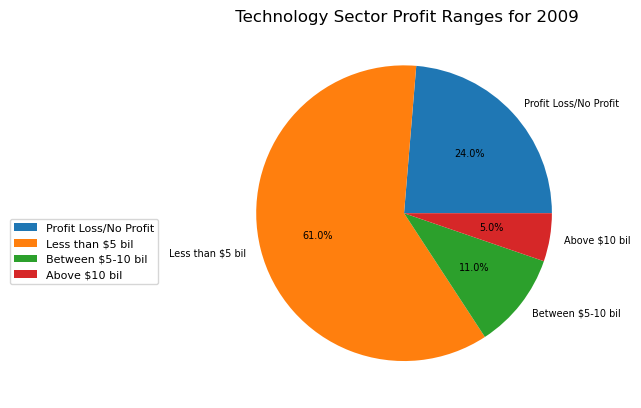

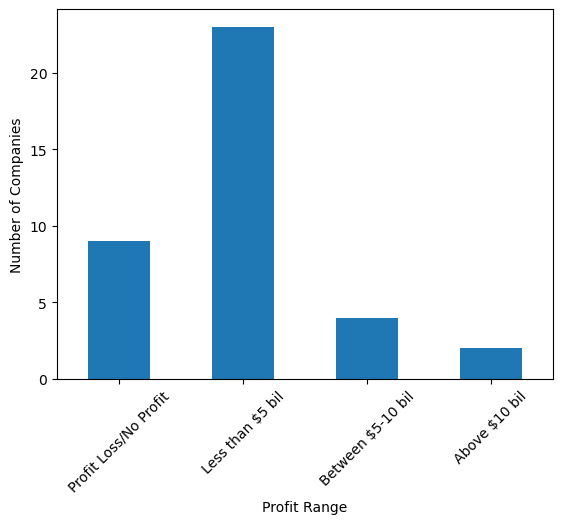

Profit Range
Profit Loss/No Profit     9
Less than $5 bil         23
Between $5-10 bil         4
Above $10 bil             2
Name: Profit Range, dtype: int64
          Profits
mean     1.696316
median   0.425000
var     17.478289
std      4.180704
sem      0.678200
min     -6.290000
max     17.230000


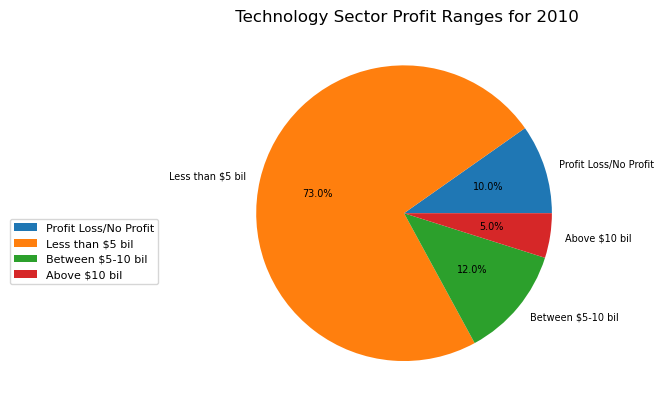

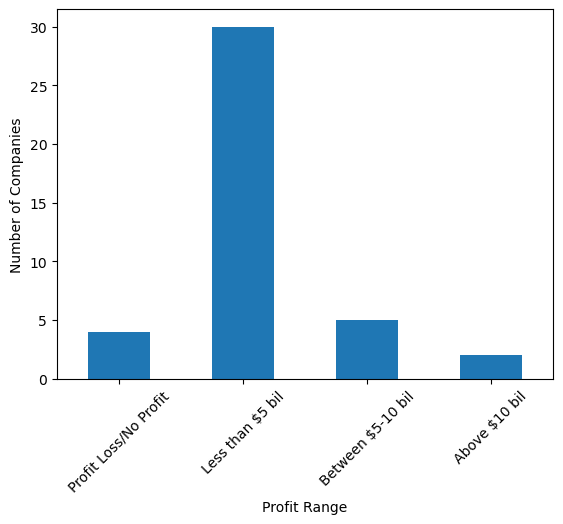

Profit Range
Profit Loss/No Profit     4
Less than $5 bil         30
Between $5-10 bil         5
Above $10 bil             2
Name: Profit Range, dtype: int64
          Profits
mean     1.967317
median   0.390000
var     14.255540
std      3.775651
sem      0.589658
min     -0.860000
max     16.260000


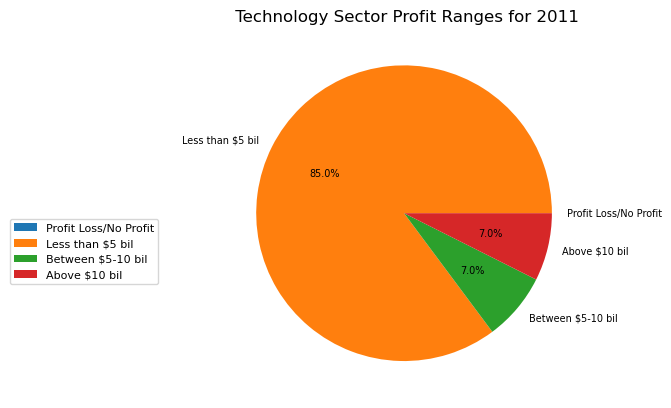

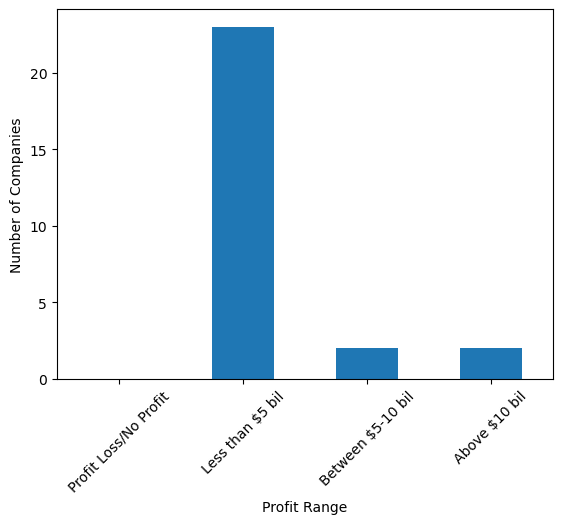

Profit Range
Profit Loss/No Profit     0
Less than $5 bil         23
Between $5-10 bil         2
Above $10 bil             2
Name: Profit Range, dtype: int64
          Profits
mean     2.458644
median   0.664200
var     19.518647
std      4.417991
sem      0.850243
min      0.127900
max     16.600000


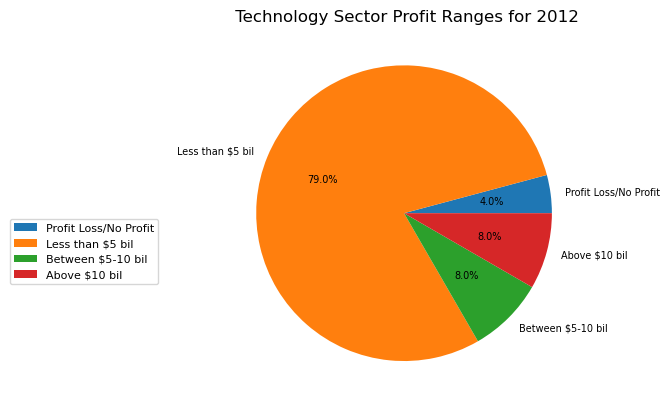

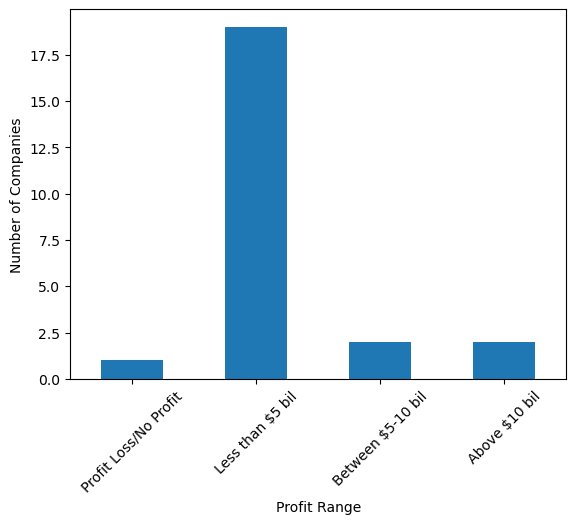

Profit Range
Profit Loss/No Profit     1
Less than $5 bil         19
Between $5-10 bil         2
Above $10 bil             2
Name: Profit Range, dtype: int64
          Profits
mean     3.212500
median   0.700000
var     54.982880
std      7.415044
sem      1.513590
min     -3.900000
max     33.000000


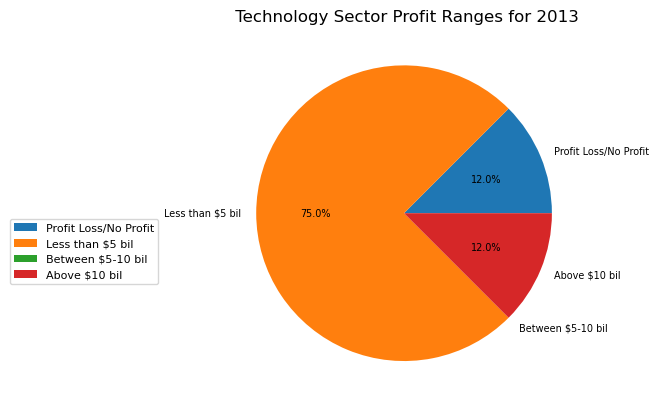

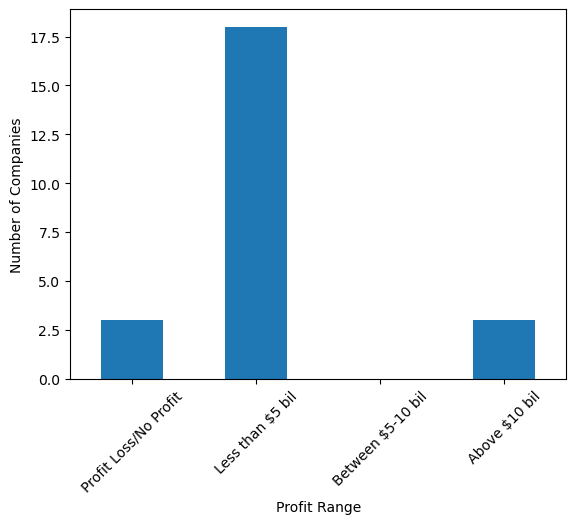

Profit Range
Profit Loss/No Profit     3
Less than $5 bil         18
Between $5-10 bil         0
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     3.108333
median   0.500000
var     91.372971
std      9.558921
sem      1.951207
min    -12.900000
max     41.700000


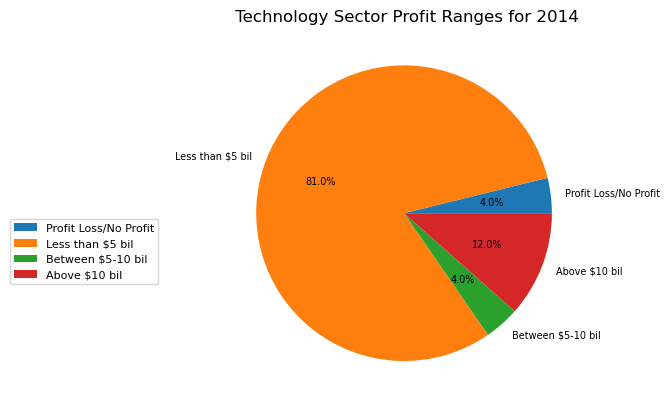

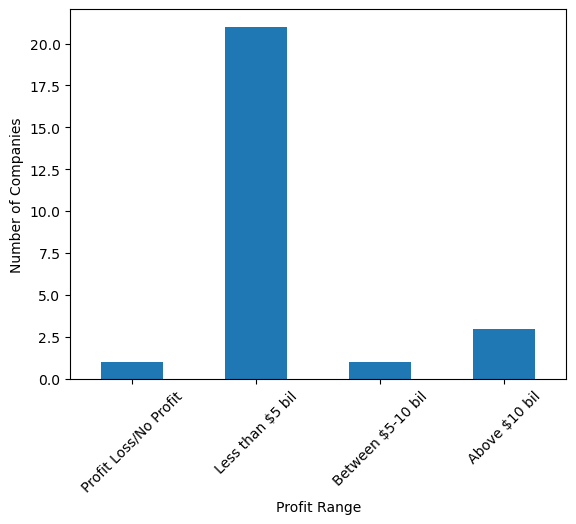

Profit Range
Profit Loss/No Profit     1
Less than $5 bil         21
Between $5-10 bil         1
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     3.396154
median   0.650000
var     61.660385
std      7.852413
sem      1.539985
min      0.000000
max     37.000000


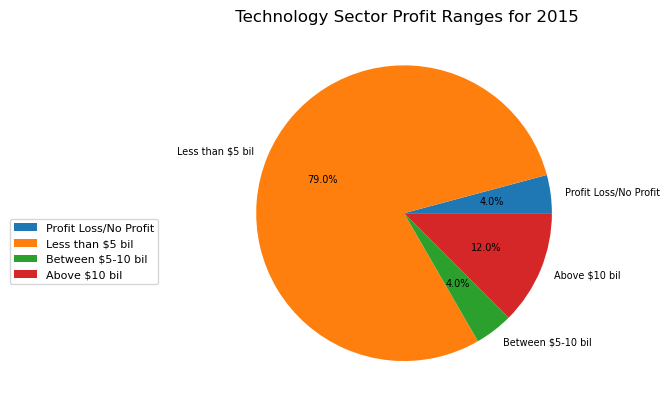

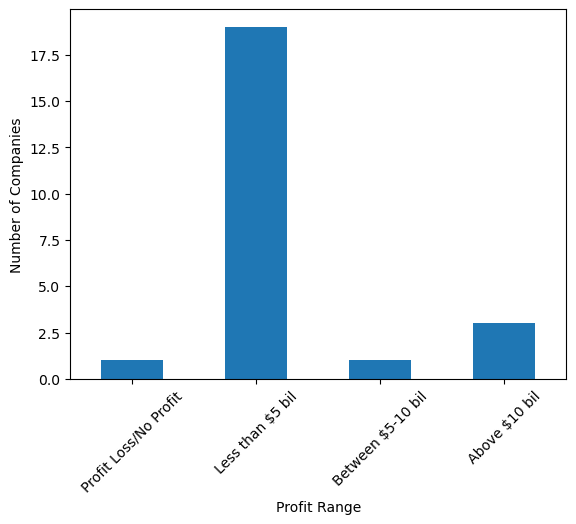

Profit Range
Profit Loss/No Profit     1
Less than $5 bil         19
Between $5-10 bil         1
Above $10 bil             3
Name: Profit Range, dtype: int64
          Profits
mean     4.084846
median   0.665550
var     87.603299
std      9.359663
sem      1.910533
min     -0.015700
max     44.462000


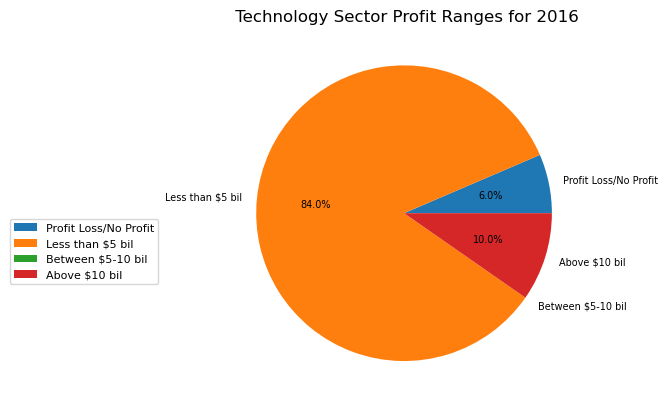

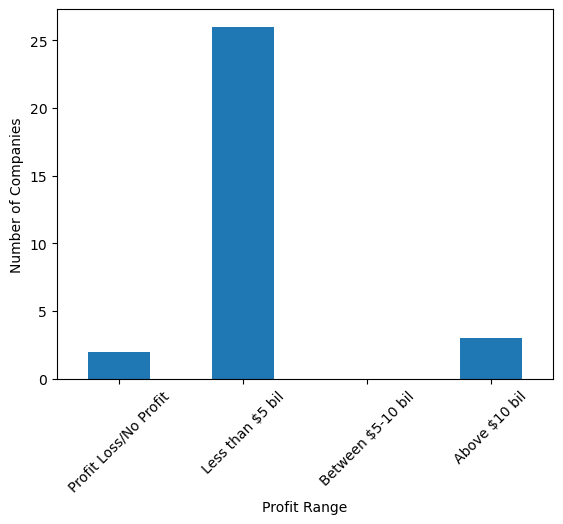

Profit Range
Profit Loss/No Profit     2
Less than $5 bil         26
Between $5-10 bil         0
Above $10 bil             3
Name: Profit Range, dtype: int64
           Profits
mean      3.298023
median    0.456200
var     102.408640
std      10.119715
sem       1.817555
min      -4.479500
max      53.731000


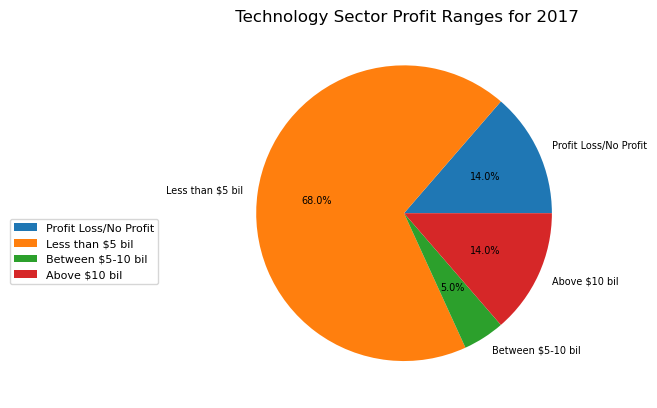

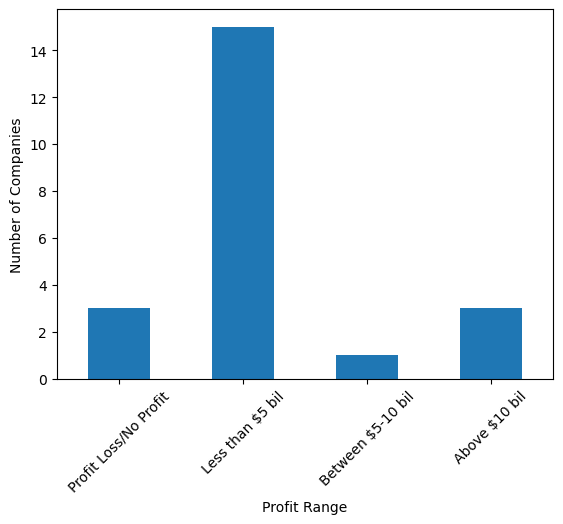

Profit Range
Profit Loss/No Profit     3
Less than $5 bil         15
Between $5-10 bil         1
Above $10 bil             3
Name: Profit Range, dtype: int64
           Profits
mean      4.280014
median    0.449650
var     108.943751
std      10.437612
sem       2.225306
min      -3.691000
max      45.217000


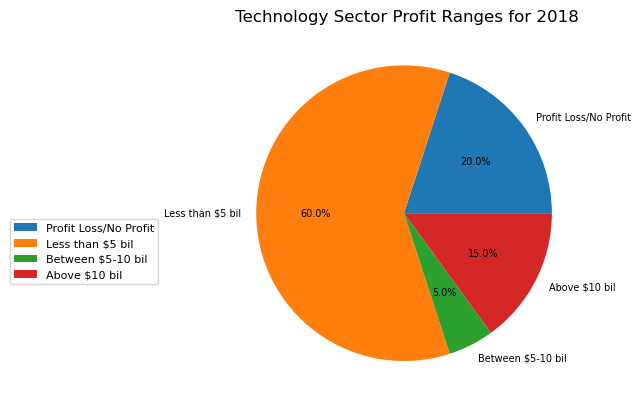

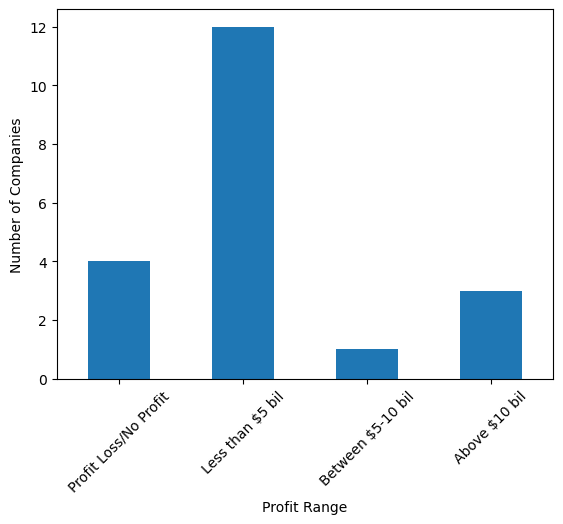

Profit Range
Profit Loss/No Profit     4
Less than $5 bil         12
Between $5-10 bil         1
Above $10 bil             3
Name: Profit Range, dtype: int64
           Profits
mean      4.972640
median    0.344350
var     158.475117
std      12.588690
sem       2.814917
min      -3.728000
max      53.318000


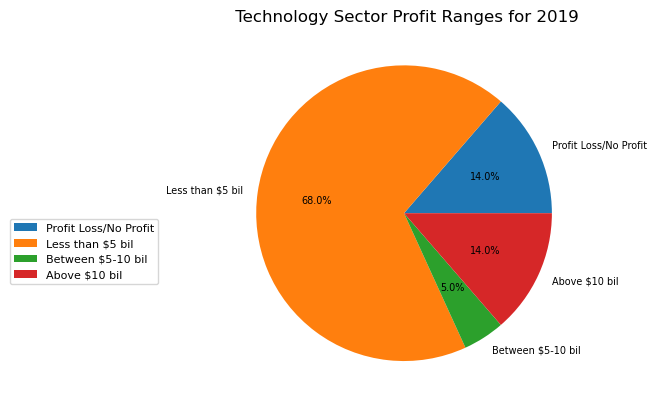

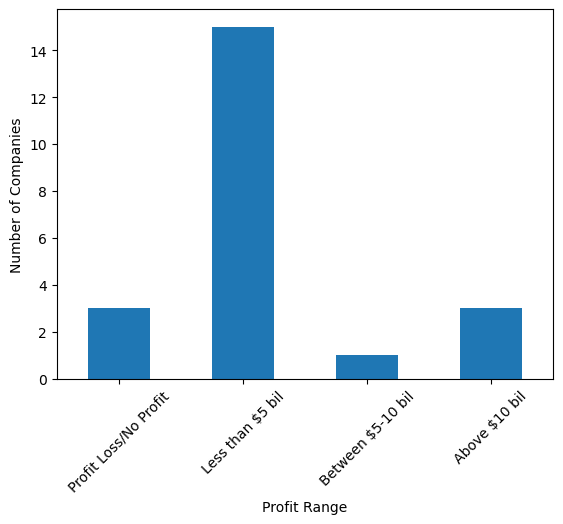

Profit Range
Profit Loss/No Profit     3
Less than $5 bil         15
Between $5-10 bil         1
Above $10 bil             3
Name: Profit Range, dtype: int64
           Profits
mean      6.069091
median    0.778500
var     203.129443
std      14.252349
sem       3.038611
min      -2.310000
max      59.431000


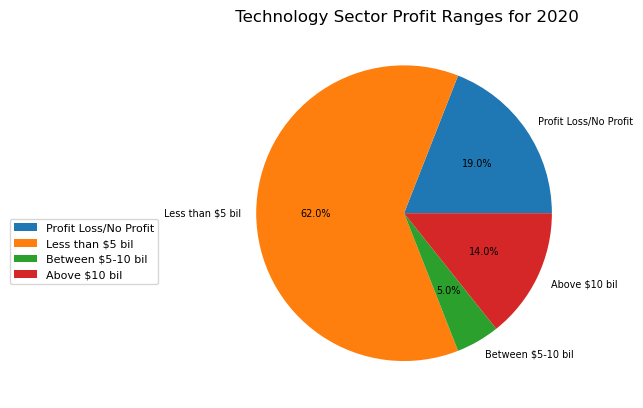

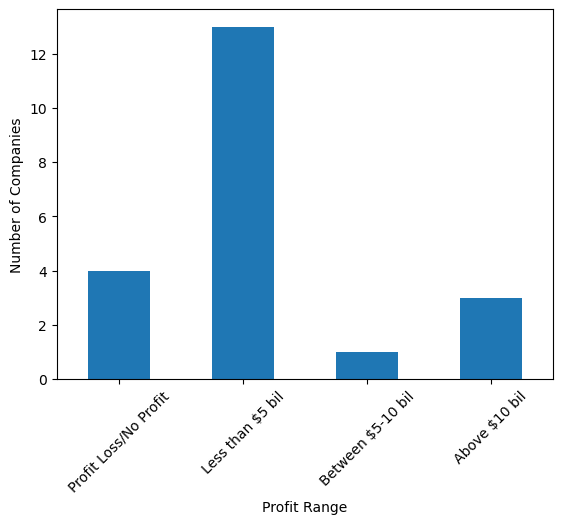

Profit Range
Profit Loss/No Profit     4
Less than $5 bil         13
Between $5-10 bil         1
Above $10 bil             3
Name: Profit Range, dtype: int64
           Profits
mean      6.546667
median    1.000000
var     206.280703
std      14.362476
sem       3.134149
min      -0.600000
max      57.200000


In [36]:
for year in years:
    profit_year = tech[tech['Year'] == year]
    ranges = profit_year.groupby('Profit Range')['Profit Range'].count()
    plt.pie(ranges.values,labels=ranges.index.values,autopct=lambda p: '{:.1f}%'.format(round(p)) if p > 0 else '',radius=1,textprops={'fontsize': 7})
    plt.title(f" Technology Sector Profit Ranges for {year}", pad=5)
    plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)
    plt.show()
    ranges.plot.bar()
    plt.xticks(rotation=45, ha='center')
    plt.ylabel('Number of Companies')
    plt.xlabel('Profit Range')
    plt.show()    
    info = profit_year.aggregate({'Profits':["mean",
                                "median", "var", "std", "sem", "min", "max"]})    
    print(ranges)
    print(info)

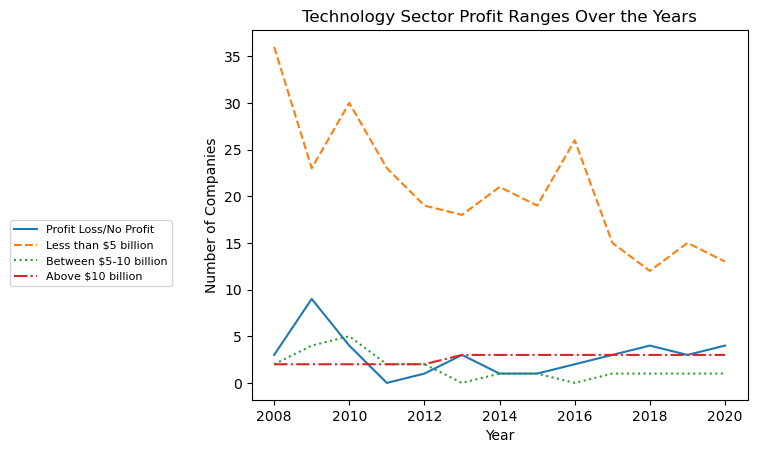

In [37]:
loss = []
less = []
between = []
above = []

for year in years:
    profits = tech[tech['Year'] == year]
    range = profits.groupby('Profit Range')['Profit Range'].count()
    loss.append(range.iloc[0])
    less.append(range.iloc[1])
    between.append(range.iloc[2])
    above.append(range.iloc[3])

plt.plot(years, loss, label = 'Profit Loss/No Profit', linestyle = '-')
plt.plot(years, less, label = 'Less than $5 billion', linestyle = '--')
plt.plot(years, between, label = 'Between $5-10 billion', linestyle = 'dotted')
plt.plot(years, above, label = 'Above $10 billion', linestyle = 'dashdot')
plt.xticks()
plt.ylabel('Number of Companies')
plt.xlabel('Year')
plt.title('Technology Sector Profit Ranges Over the Years')
plt.legend(bbox_to_anchor=(-0.15, .5), fontsize=8)